In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240924_161949.braidz")
df,csvs["opto"]


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240924_161949.braidz using pyarrow


(         obj_id    frame     timestamp         x         y         z  \
 0             8  1120137  1.727191e+09  0.014364 -0.010718  0.165003   
 1             8  1120138  1.727191e+09  0.018904 -0.010017  0.160847   
 2             9  1120139  1.727191e+09  0.019915 -0.028692  0.160393   
 3             8  1120139  1.727191e+09  0.023445 -0.009316  0.156692   
 4             8  1120140  1.727191e+09  0.027985 -0.008615  0.152537   
 ...         ...      ...           ...       ...       ...       ...   
 9634472  111627  8072603  1.727260e+09 -0.056712 -0.233318  0.001495   
 9634473  111627  8072604  1.727260e+09 -0.056742 -0.233314  0.001483   
 9634474  111627  8072605  1.727260e+09 -0.056771 -0.233309  0.001471   
 9634475  111627  8072606  1.727260e+09 -0.056800 -0.233305  0.001459   
 9634476  111627  8072607  1.727260e+09 -0.056881 -0.233320  0.001476   
 
              xvel      yvel      zvel           P00           P01  \
 0        0.454050  0.070084 -0.415520  2.589295e-07

In [4]:
data = extract_stimulus_centered_data(df, csvs["opto"])
list(data)
AngV_J64 = data['angular_velocity']
print(AngV_J64)

[array([-3.10522936e-01,  3.94125817e-01, -8.91807294e-01, -1.54160554e+00,
       -1.14862015e+00, -9.54458743e-01, -4.06065350e-01, -2.04511740e-01,
       -3.37166825e-01, -7.03934726e-01, -6.65428056e-01, -2.42352005e-01,
       -8.00833518e-01, -7.61677259e-01, -8.93583666e-01, -8.95581330e-01,
       -4.14161138e-01, -3.23555601e-01, -3.72044588e-01, -1.18116416e+00,
       -6.22680472e-01, -2.77890084e-02, -1.35802465e+00, -4.07317440e+00,
       -1.16976254e+01, -2.27909571e+01, -3.31348725e+01, -3.83559240e+01,
       -3.67672303e+01, -2.98505894e+01, -2.10586535e+01, -1.41299995e+01,
       -8.84265505e+00, -4.67109543e+00, -1.55611862e+00,  1.02437277e-01,
        2.23500575e+00,  3.91420428e+00,  4.80109025e+00,  4.49977575e+00,
        3.88328521e+00,  4.23134530e+00,  4.08241969e+00,  4.49258299e+00,
        4.13059848e+00,  3.53756304e+00,  2.41385434e+00,  2.15906726e+00,
        3.13702930e+00,  2.74912856e+00,  2.09498413e+00,  1.97937486e+00,
        1.38575434e+00, 

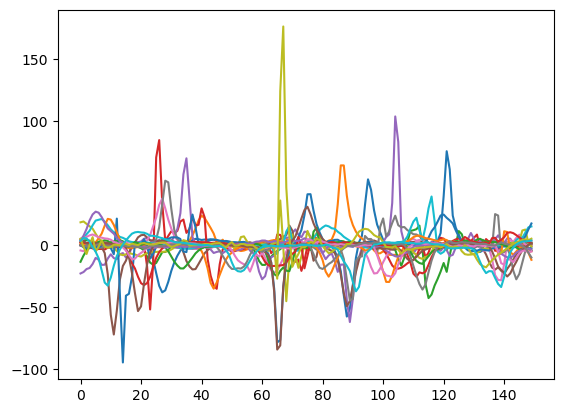

In [5]:
fig = plt.figure()
for d in AngV_J64:
    plt.plot(d)

plt.show()

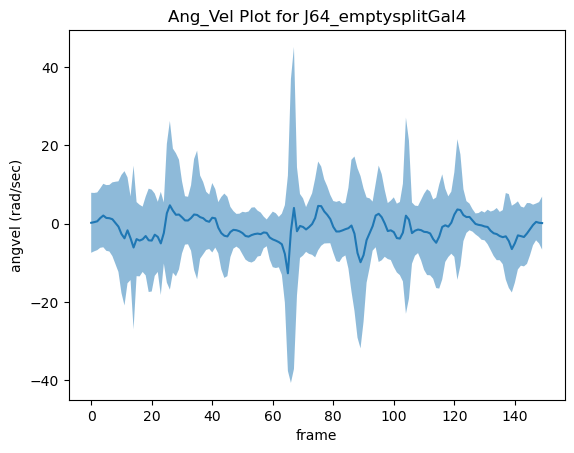

In [6]:
fig_combined, ax_combined = plt.subplots()
plot_mean_and_std(AngV_J64, ax=ax_combined)
ax_combined.set_xlabel("frame")
ax_combined.set_ylabel("angvel (rad/sec)")
ax_combined.set_title("Ang_Vel Plot for J64_emptysplitGal4")
plt.show()

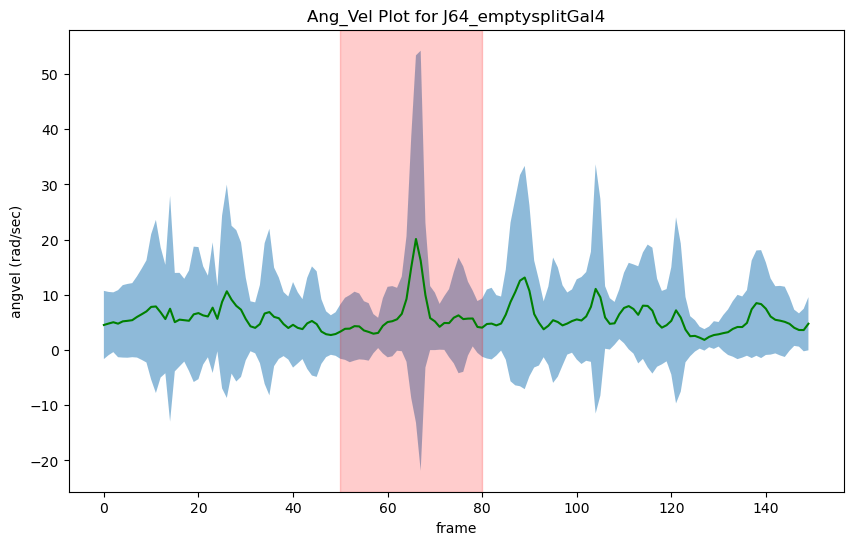

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_mean_and_std(np.abs(AngV_J64), ax=ax, label='Ang_Vel Plot of J64', color='green')
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.2)
ax.set_title("Ang_Vel Plot for J64_emptysplitGal4")

plt.show()